In [1]:
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
%matplotlib inline  

In [17]:
L = 32
m = 0.05
phi = 0.0

C= 7.06789929214e-17


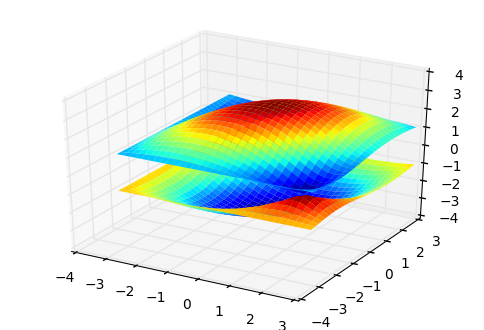

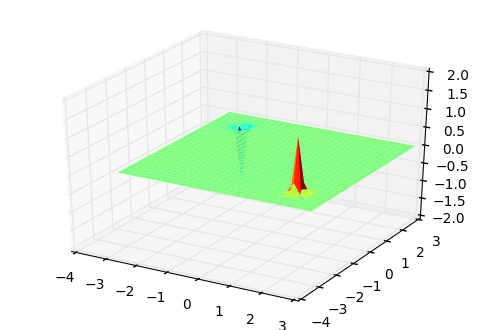

In [18]:
a1 = np.sqrt(3)*np.array([1.0,0.0])
a2 = np.sqrt(3)*np.array([0.5,np.sqrt(3)/2.0])

b1=2.0*np.pi/3.0/float(L)*np.array([np.sqrt(3), -1.0])
b2=4.0*np.pi/3.0/float(L)*np.array([0.0, 1.0])

def honey(kx,ky,m,phi):
    s0 = np.array([[1.0,0.0],[0.0,1.0]])
    s1 = np.array([[0.0,1.0],[1.0,0.0]])
    s2 = np.array([[0.0,-1j],[1j,0.0]])
    s3 = np.array([[1.0,0.0],[0.0,-1.0]])  
        
    d1 = np.cos(kx*a1[0] + ky*a1[1]) + np.cos((kx*a2[0] + ky*a2[1])) + 1.0
    d2 = np.sin(kx*a1[0] + ky*a1[1]) + np.sin((kx*a2[0] + ky*a2[1]))
    d3 = m + 2*np.sin(phi)*(np.sin(kx*a1[0] + ky*a1[1])+np.sin(kx*a2[0] + ky*a2[1])+np.sin(kx*(a1[0]-a2[0]) + ky*(a1[1]-a2[1])))
    H = d1*s1 + d2*s2 + d3*s3 
    
    return(H)
    
# Getting the single particle bands:
E1 = np.array([])
E2 = np.array([])
V1 = np.array([])
V2 = np.array([])
for la in np.arange(-L/2,L/2):
    for lb in np.arange(-L/2,L/2):  
        kx,ky=la*b1+lb*b2
        
        H=honey(kx,ky,m,phi)
      
        e,v = np.linalg.eigh(H)
        piv = np.argsort(np.real(e))
    
        e = np.real(e[piv])
        v = v[:,piv]
            
        E1 = np.append(E1,e[0])
        E2 = np.append(E2,e[1])
        
        V1 = np.append(V1,v[:,0])
        V2 = np.append(V2,v[:,1])

E1 = np.reshape(E1,(L,L))
E2 = np.reshape(E2,(L,L))
V1 = np.reshape(V1,(L,L,2))
V2 = np.reshape(V2,(L,L,2))

# Getting the U(1) link Variables
U1_1 = np.array([])
U1_2 = np.array([])
for la in np.arange(0,L):
    for lb in np.arange(0,L):  
        X = np.inner(np.conj(V1[la,lb,:]),V1[np.mod(la+1,L),lb,:])
        U1_1 = np.append(U1_1,X/np.abs(X))

        X = np.inner(np.conj(V1[la,lb,:]),V1[la,np.mod(lb+1,L),:])
        U1_2 = np.append(U1_2,X/np.abs(X))

U1_1 = np.reshape(U1_1,(L,L))
U1_2 = np.reshape(U1_2,(L,L))

# Calculate the Berry curvature
F12 =  np.array([])
for la in np.arange(0,L):
    for lb in np.arange(0,L):  
        X = U1_1[la,lb]*U1_2[np.mod(la+1,L),lb]*U1_1[la,np.mod(lb+1,L)]**(-1)*U1_2[la,lb]**(-1)
        F12 = np.append(F12, np.log(X))

F12 = np.reshape(F12,(L,L))
print "C=",np.real(np.sum(F12)/2.0/np.pi/1j)

# Plotting the bands:
fig1 = plt.figure()
ax = fig1.add_subplot(111, projection='3d')

KX = np.arange(-L/2,L/2)/float(L)*2*np.pi
KY = np.arange(-L/2,L/2)/float(L)*2*np.pi
KX,KY = np.meshgrid(KX,KY)

surf = ax.plot_surface(KX, KY, E1, cmap=plt.cm.jet, rstride=1, cstride=1,linewidth=0, antialiased=True)
surf = ax.plot_surface(KX, KY, E2, cmap=plt.cm.jet, rstride=1, cstride=1,linewidth=0, antialiased=True)
                       
# Plotting the Curvature:
fig3 = plt.figure()
ax = fig3.add_subplot(111, projection='3d')

surf = ax.plot_surface(KX, KY, np.imag(F12),cmap=plt.cm.jet, rstride=1, cstride=1,linewidth=0, antialiased=True)